# 🎶 Objectif 2 : Analyse des Flux Musicaux

#### Rappel

Analyse des aires de flux pour quatre caractéristiques musicales clé. L'objectif est d'identifier les périodes où il serait stratégique de sortir des morceaux qui se démarquent par leur niveau de dansabilité, d'énergie, d'acoustique, ou d'équilibre.

In [7]:
# Import
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Chargement
df = pd.read_csv("./dataset/dataset_filtered.csv")
print("Colonnes disponibles :", df.columns)

# Préparation des données
df['annee'] = df['released_year']

# Vérification des valeurs manquantes
missing_values = df[['danceability', 'energy', 'acousticness', 'valence', 'annee']].isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values[missing_values > 0])

Colonnes disponibles : Index(['track', 'artist_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'spotify_playlists', 'spotify_charts',
       'streams', 'apple_playlists', 'apple_charts', 'deezer_playlists',
       'deezer_charts', 'shazam_charts', 'bpm', 'key', 'mode', 'danceability',
       'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness', 'country_mb', 'tags_lastfm'],
      dtype='object')
Valeurs manquantes par colonne :
 Series([], dtype: int64)


In [9]:
# On calcule la moyenne des colonnes pertinentes par année pour suivre les tendances annuelles
df_agg = df.groupby('annee')[['danceability', 'energy', 'acousticness', 'valence']].mean().reset_index()
print("Données agrégées par année :")
print(df_agg.head())

Données agrégées par année :
   annee  danceability  energy  acousticness  valence
0   1930          65.0    80.0          22.0     49.0
1   1942          23.0    25.0          91.0     19.0
2   1946          36.0    15.0          84.0     22.0
3   1950          60.0    32.0          88.0     86.0
4   1952          67.0    36.0          64.0     81.0


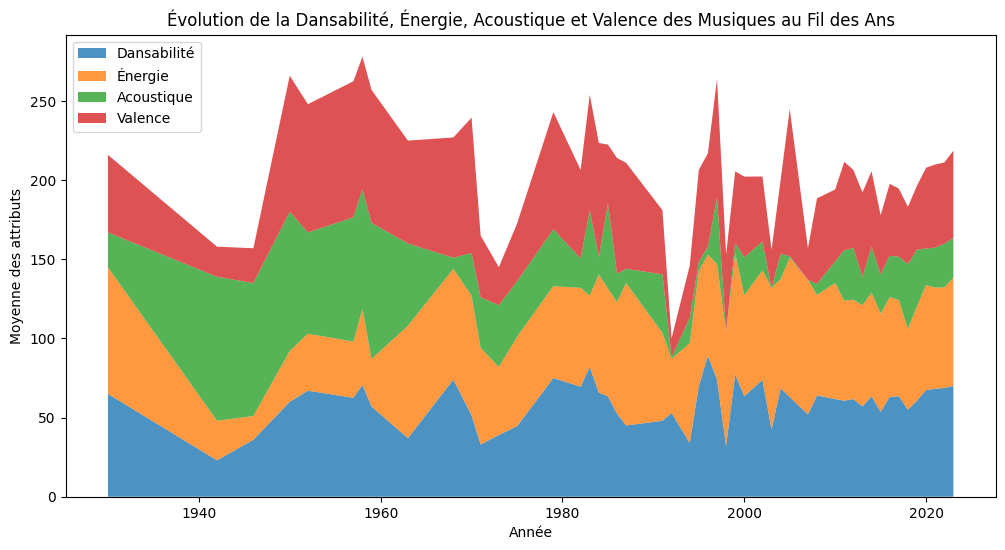

In [10]:
# Graphique en aire de flux
plt.figure(figsize=(12, 6))

plt.stackplot(df_agg['annee'],
              df_agg['danceability'], df_agg['energy'], df_agg['acousticness'], df_agg['valence'],
              labels=['Dansabilité', 'Énergie', 'Acoustique', 'Valence'],
              alpha=0.8)
plt.legend(loc='upper left')
plt.xlabel("Année")
plt.ylabel("Moyenne des attributs")
plt.title("Évolution de la Dansabilité, Énergie, Acoustique et Valence des Musiques au Fil des Ans")
plt.show()